# Прогнозирование оттока клиентов фитнес центра

## Описание проекта
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;

сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;

проанализировать основные признаки, наиболее сильно влияющие на отток;

сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;
2) предложить меры по снижению оттока;
3) определить другие особенности взаимодействия с клиентами.

## Описание данных
Набор данных включает следующие поля:
- 'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:
Данные пользователя за предыдущий до проверки факта оттока месяц:
- 'gender' — пол
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
- 'Phone' — наличие контактного телефона
- 'Age' — возраст
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
- 'Group_visits' — факт посещения групповых занятий
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

## Оглавление:
- [Шаг 1. Загрузите данные ](#1)
- [Шаг 2. Проведите исследовательский анализ данных (EDA)](#2)
- [Шаг 3. Постройте модель прогнозирования оттока пользователей](#3)
- [Шаг 4. Сделайте кластеризацию пользователей](#4)
- [Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами](#5)

### <a id='1'>Шаг 1. Загрузите данные</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
gym_churn = pd.read_csv('/media/max/TOSHIBA EXT/YANDEX.Практикум/Файлы/gym_churn.csv')

In [3]:
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
gym_churn['Avg_additional_charges_total'] = gym_churn['Avg_additional_charges_total'].round(1)
gym_churn['Avg_class_frequency_total'] = gym_churn['Avg_class_frequency_total'].round(2)
gym_churn['Avg_class_frequency_current_month'] = gym_churn['Avg_class_frequency_current_month'].round(2)
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.2,5.0,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.2,12.0,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.4,1.0,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.7,12.0,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.4,1.0,3,1.11,1.12,0


### Вывод
Размеры датасета : 14 колонок и 4000 строк. Все признаки имеют числовой тип.Для удубства анализа округлили значения в колонках Avg_additional_charges_total,Avg_class_frequency_total и Avg_class_frequency_current_month.

### <a id='2'>Шаг 2. Проведите исследовательский анализ данных (EDA)</a>

#### 2.1 Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe()

In [6]:
gym_churn.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [7]:
gym_churn.duplicated().sum()

0

In [8]:
gym_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.0,0.000,1.00,1.000,1.00
Near_Location,4000.0,0.845250,0.361711,0.0,1.000,1.00,1.000,1.00
Partner,4000.0,0.486750,0.499887,0.0,0.000,0.00,1.000,1.00
Promo_friends,4000.0,0.308500,0.461932,0.0,0.000,0.00,1.000,1.00
Phone,4000.0,0.903500,0.295313,0.0,1.000,1.00,1.000,1.00
Contract_period,4000.0,4.681250,4.549706,1.0,1.000,1.00,6.000,12.00
Group_visits,4000.0,0.412250,0.492301,0.0,0.000,0.00,1.000,1.00
Age,4000.0,29.184250,3.258367,18.0,27.000,29.00,31.000,41.00
Avg_additional_charges_total,4000.0,146.943675,96.355200,0.1,68.875,136.20,210.925,552.60
Month_to_end_contract,4000.0,4.322750,4.191297,1.0,1.000,1.00,6.000,12.00


Пропуски и дубликаты в данных отсутствуют.

**<font color="blue">
Для среднестатистического клиент клуба характерно :
- возраст 29 лет
- траты на доп.услуги порядка 146 рублей
- проживание или работа в этом же районе
- частота посещений 1.8 раз в неделю</font>**


    
Обратитим внимание на переменные Group_visits, Age и Avg_additional_charges_total: У них очень разные средние и очень разные по величине стандартные отклонения.
Это говорит о том, что переменные нужно стандартизировать.

#### 2.2 Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby())

In [9]:
gym_churn.groupby('Churn').agg('mean').T

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445934,115.082092
Month_to_end_contract,5.283089,1.662582


Видим, что у нас нет различий между средними значениями по гендерному признаку и наличию контактного телефона.По всем остальным признакам средние значения отличаются существенно.Больше всего разница видна в значениях Lifetime и Contract_period . У ушедших клиентов этот показатель кратно ниже. Интересно также, что клиенты, перестающие посещать спортзал, в среднем моложе.Возможно более зрелый человек осознаннее подходит к принятию решений, в том числе, в отношении регулярного посещения спортзала. Вполне логичным выглядит показатель Promo_friends, который у ушедших клиентов вдвое ниже. Часто в компании интереснее тренироваться.

#### 2.3 Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

In [10]:
gym_churn.columns.to_list()

['gender',
 'Near_Location',
 'Partner',
 'Promo_friends',
 'Phone',
 'Contract_period',
 'Group_visits',
 'Age',
 'Avg_additional_charges_total',
 'Month_to_end_contract',
 'Lifetime',
 'Avg_class_frequency_total',
 'Avg_class_frequency_current_month',
 'Churn']

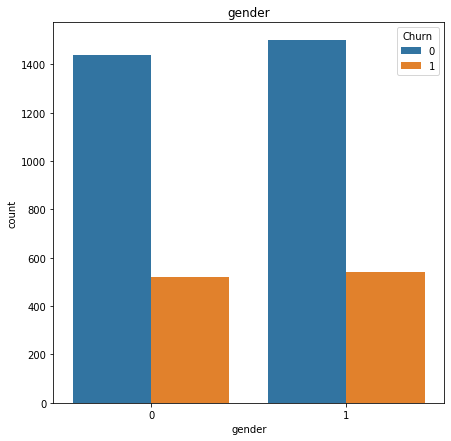

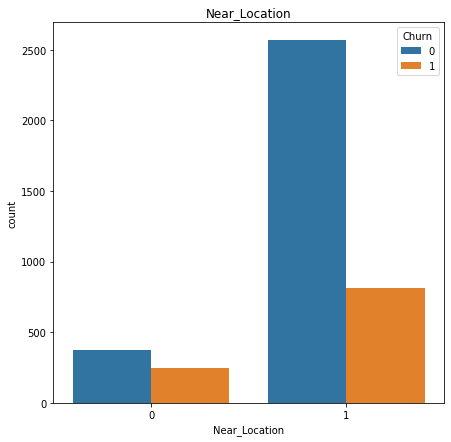

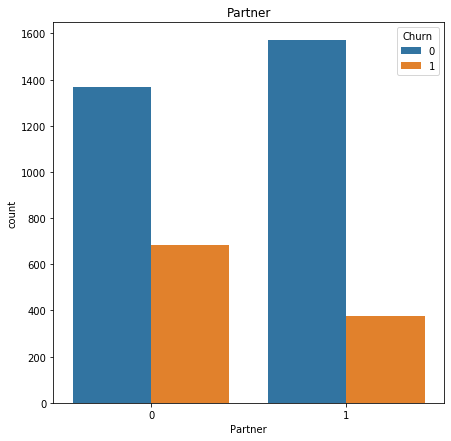

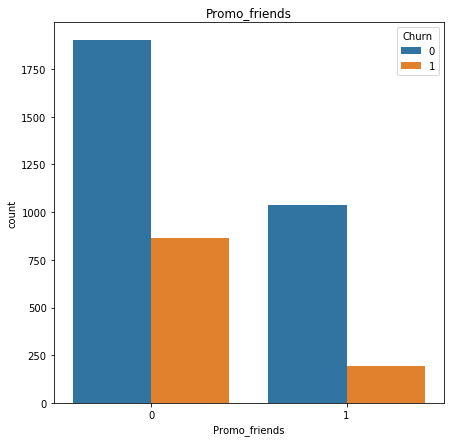

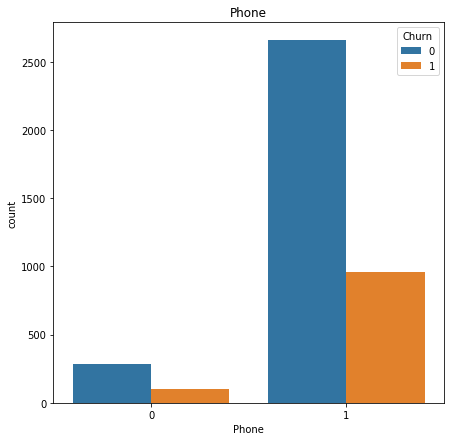

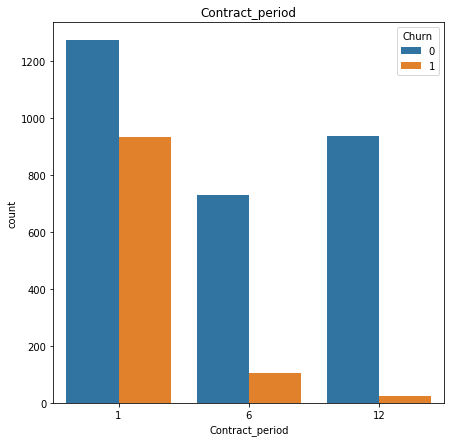

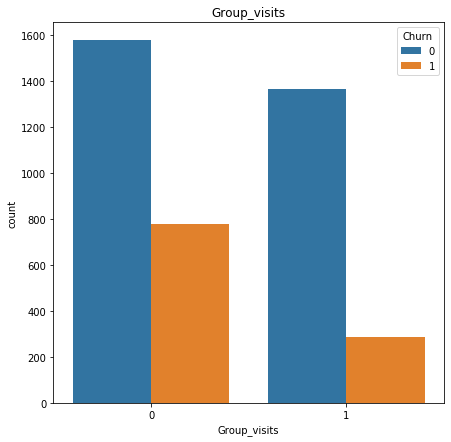

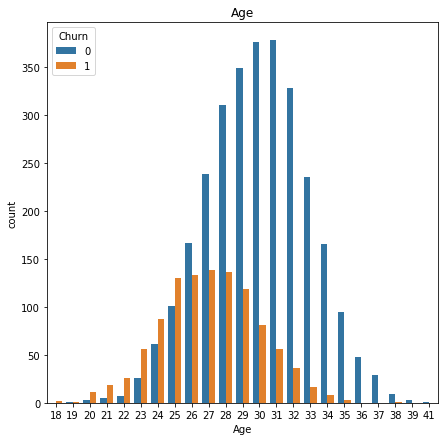

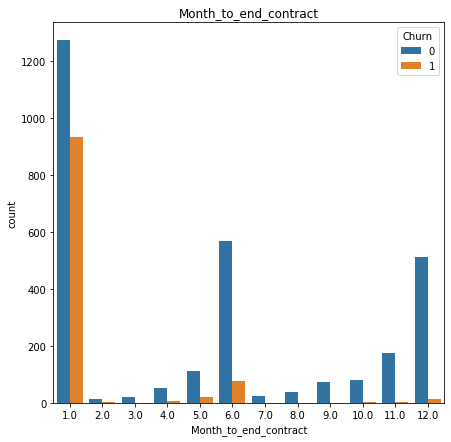

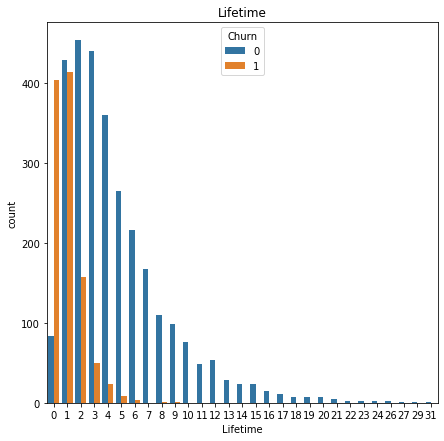

In [11]:
for column in ['gender','Near_Location','Partner','Promo_friends','Phone','Contract_period',\
'Group_visits','Age','Month_to_end_contract','Lifetime']:
    plt.figure(figsize=(7, 7))
    sns.countplot(x = gym_churn[column], hue='Churn', data=gym_churn)
    plt.title(column)
    plt.show()

У клиентов из оттока большинство не проживает или не работает в районе, где находится фитнес-центр. Естественно , если человеку нужно далеко ездить, вероятнее он будет искать варианты ближе. Большое число оттока у клиентов с длительностью текущего абонемента - 1 месяц.

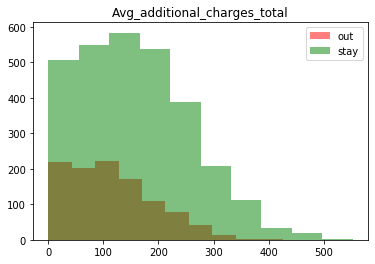

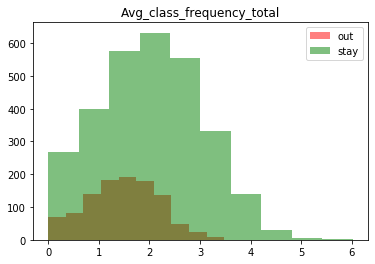

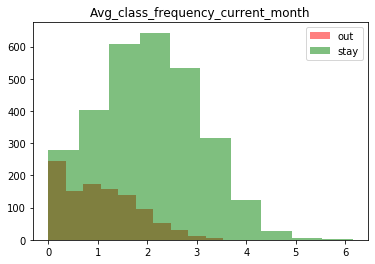

In [12]:
for column in ['Avg_additional_charges_total','Avg_class_frequency_total','Avg_class_frequency_current_month']:
    plt.hist(gym_churn.query('Churn==1')[column],color='r', alpha=0.5, label="out")
    plt.hist(gym_churn.query('Churn==0')[column], color='g', alpha=0.5, label="stay")
    plt.legend()
    plt.title(column)
    
    plt.show()

'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента и 
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц у клиентов из оттока меньше , чем у оставшихся клиентов.
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра у клиентов, которые попали в отток, кратно меньше.

#### 2.4 Постройте матрицу корреляций и отобразите её

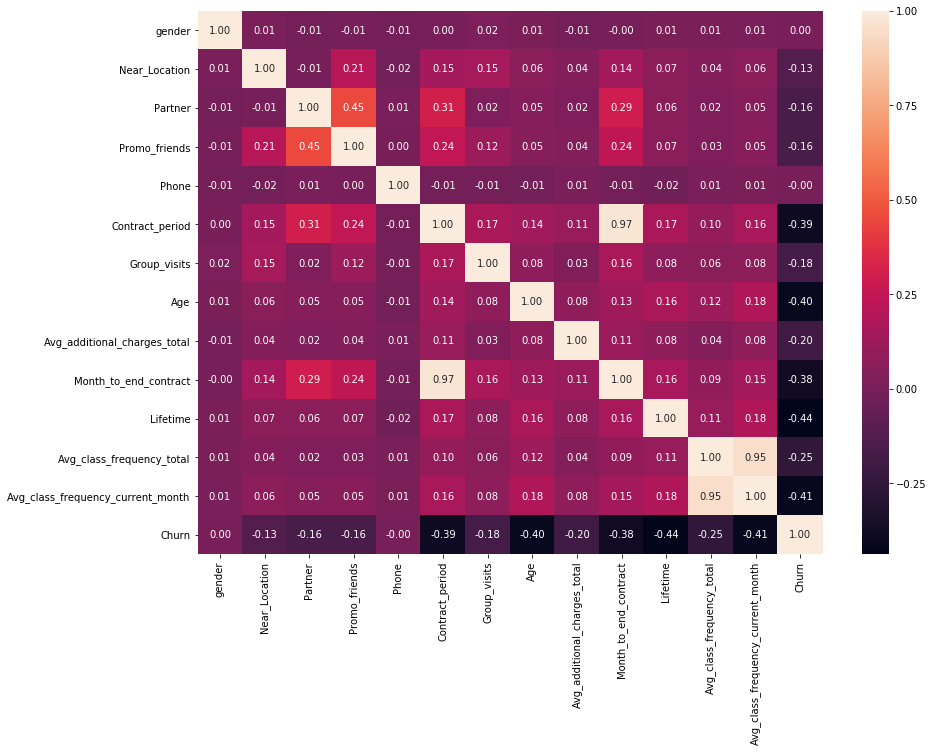

In [13]:
cor = gym_churn.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(data=cor,annot=True, fmt = '0.2f')

По матрице корреляций видно, что есть две пары сильнокоррелирующих признаков: contract_period - month_to_end_contract; avg_class_frequency_current_month - avg_class_frequency_total.

Есть два признака с нулевой корреляцией с целевой переменной: phone и gender.

In [14]:
gym_churn.drop(['Month_to_end_contract', 'Avg_class_frequency_current_month'], axis='columns', inplace=True)

gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
gender                          4000 non-null int64
Near_Location                   4000 non-null int64
Partner                         4000 non-null int64
Promo_friends                   4000 non-null int64
Phone                           4000 non-null int64
Contract_period                 4000 non-null int64
Group_visits                    4000 non-null int64
Age                             4000 non-null int64
Avg_additional_charges_total    4000 non-null float64
Lifetime                        4000 non-null int64
Avg_class_frequency_total       4000 non-null float64
Churn                           4000 non-null int64
dtypes: float64(2), int64(10)
memory usage: 375.1 KB


**<font color="blue">
Удалим сильно коррелируемы колонки 'Month_to_end_contract' и 'Avg_class_frequency_current_month'</font>**

### Вывод
Ознакомились с датасетом:пропуски и дубликаты в данных отсутствуют.

Посмотрели на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался: 
Видим, что у нас нет различий между средними значениями по гендерному признаку и наличию контактного телефона.По всем остальным признакам средние значения отличаются существенно.Больше всего разница видна в значениях Lifetime и Contract_period . У ушедших клиентов этот показатель кратно ниже. Интересно также, что клиенты, перестающие посещать спортзал, в среднем моложе.Возможно более зрелый человек осознаннее подходит к принятию решений, в том числе, в отношении регулярного посещения спортзала. Вполне логичным выглядит показатель Promo_friends, который у ушедших клиентов вдвое ниже. Часто в компании интереснее тренироваться.

Построили столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался: 
У клиентов из оттока большинство не проживает или не работает в районе, где находится фитнес-центр. Естественно , если человеку нужно далеко ездить, вероятнее он будет искать варианты ближе. Большое число оттока у клиентов с длительностью текущего абонемента - 1 месяц.
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента и 
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц у клиентов из оттока меньше , чем у оставшихся клиентов.
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра у клиентов, которые попали в отток, кратно меньше.

Построили матрицу корреляций и отобразили её:
По матрице корреляций видно, что есть две пары сильнокоррелирующих признаков: contract_period-month_to_end_contract; avg_class_frequency_current_month - avg_class_frequency_total.Есть два признака с нулевой корреляцией с целевой переменной: phone и gender.


### <a id='3'>Шаг 3. Постройте модель прогнозирования оттока пользователей</a> 
Постройте модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце

#### 3.1 Разбейте данные на обучающую и валидационную выборку функцией train_test_split().

In [15]:
X = gym_churn.drop('Churn', axis = 1)
y = gym_churn['Churn']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 3.2 Обучите модель на train-выборке двумя способами:
- логистической регрессией
- случайным лесом

Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

##### логистическая регрессия

In [19]:
model = LogisticRegression(solver = 'lbfgs')

In [20]:
model.fit(X_train_st, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
predictions = model.predict(X_test_st)
probabilities =  model.predict_proba(X_test_st)[:,1]

In [22]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.90
Precision: 0.79
Recall: 0.81
F1: 0.80


##### случайный лес

In [23]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [25]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.89
Precision: 0.79
Recall: 0.78
F1: 0.78


### Вывод
Обучили модель на train-выборке двумя способами:логистической регрессией и случайным лесом.Доля правильных ответов, точность и  полнота чуть лучше у модели,обученной логистической регрессей. Хотя и случайный лес показал себя довольно хорошо.

### <a id='4'>Шаг 4. Сделайте кластеризацию пользователей</a>

#### 4.1 Стандартизируйте данные

In [26]:
gc_sс = gym_churn.drop(['Churn'], axis=1)
gc_sс.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total
0,1,1,1,1,0,6,1,29,14.2,3,0.02
1,0,1,0,0,1,12,1,31,113.2,7,1.92
2,0,1,1,0,1,1,0,28,129.4,2,1.86
3,0,1,1,1,1,12,1,33,62.7,2,3.21
4,1,1,1,1,1,1,0,26,198.4,3,1.11


In [27]:
gc_sс = StandardScaler().fit_transform(gc_sс)

#### 4.2 Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму.На основании полученного графика предположите, какое количество кластеров можно выделить.

In [28]:
linked = linkage(gc_sс, method = 'ward')


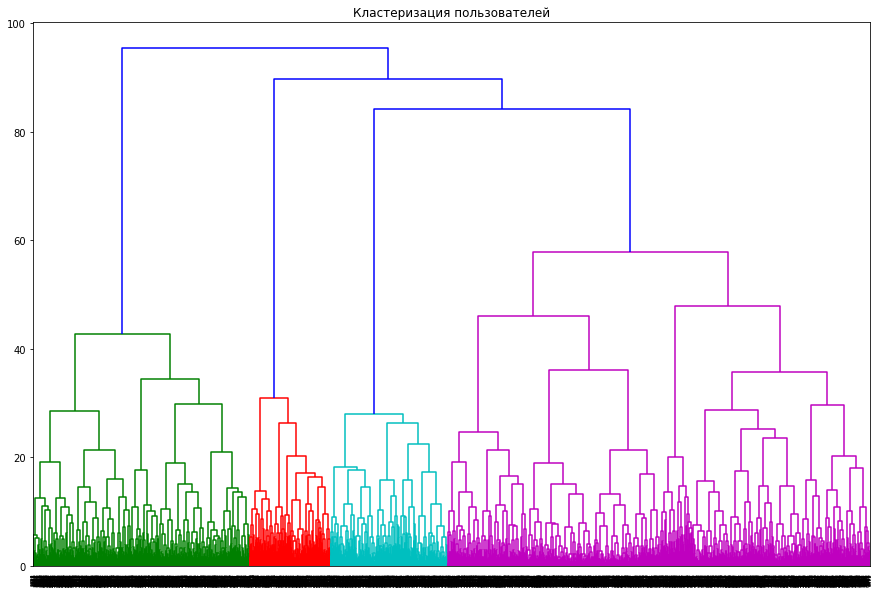

In [29]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация пользователей')
plt.show()

На основании построенной дендограммы, можно сделать предположение, что у нас есть 4 кластера.

<div class="alert alert-success">
<h3> Комментарий ревьювера</h3>

Абсолютно верно 👍🏻
</div>

#### 4.3 Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. 

In [30]:
km = KMeans(n_clusters = 5)

In [31]:
labels = km.fit_predict(gc_sс)
gym_churn['cluster_km'] = labels

#### 4.4 Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

In [32]:
gym_churn['cluster_km'].value_counts()

4    1196
2    1003
1     858
0     557
3     386
Name: cluster_km, dtype: int64

Кластеры различаются по количеству клиентов.

In [33]:
gym_churn.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.500898,0.530303,0.497507,0.523316,0.506689
Near_Location,0.000000,0.995338,0.995015,0.862694,1.000000
Partner,0.488330,0.445221,0.887338,0.471503,0.184783
Promo_friends,0.077199,0.005828,1.000000,0.305699,0.054348
Phone,1.000000,1.000000,1.000000,0.000000,1.000000
Contract_period,2.978456,7.069930,6.837488,4.777202,1.921405
Group_visits,0.231598,0.533800,0.522433,0.427461,0.311873
Age,28.685817,30.742424,29.534397,29.297927,27.968227
Avg_additional_charges_total,137.277199,179.568065,152.488833,144.210104,124.272993
Lifetime,2.978456,5.645688,4.284148,3.940415,2.155518


Наибольший отток у кластеров 0 и 1:
- у них меньше Contract_period
- у них меньше факт посещения групповых занятий
- у них меньше возраст
- у них меньше траты на доп.услуги
- меньше посещений занятий за месяц

Наименьший отток у кластеров 3 и 4:
- Contract_period больше
- возраст больше
- факт посещения групповых занятий больше
- больше Lifetime - время с момента первого обращения
- большими расходами на доп. услуги
- средняя частота посещений в неделю и за  месяц больше

#### 4.5 Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

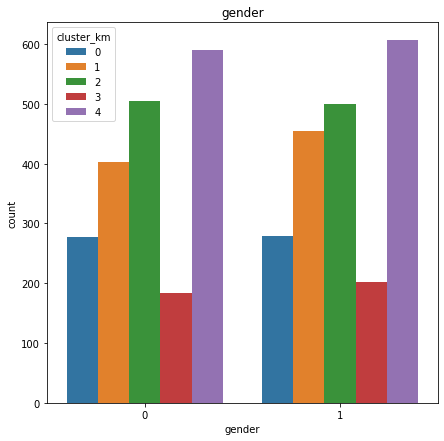

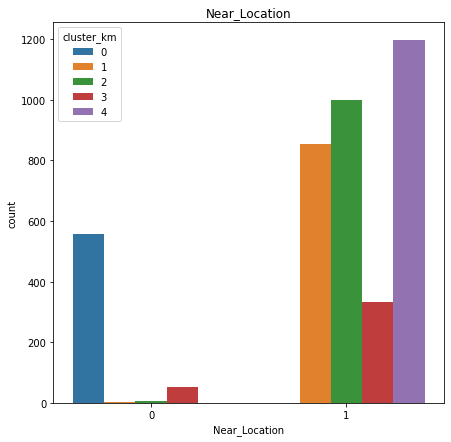

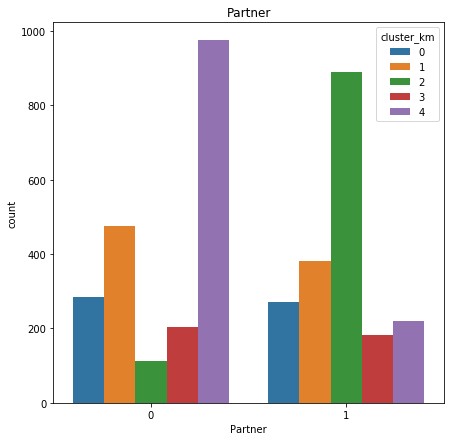

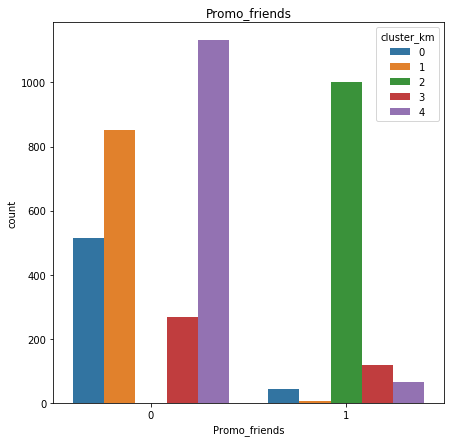

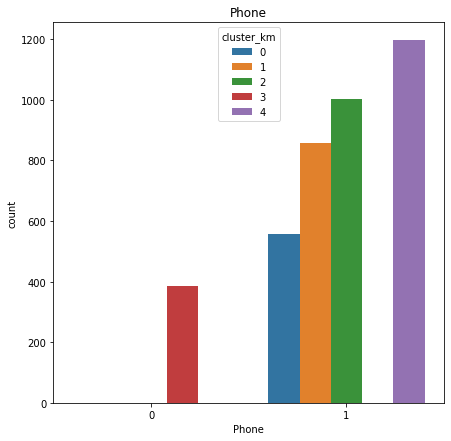

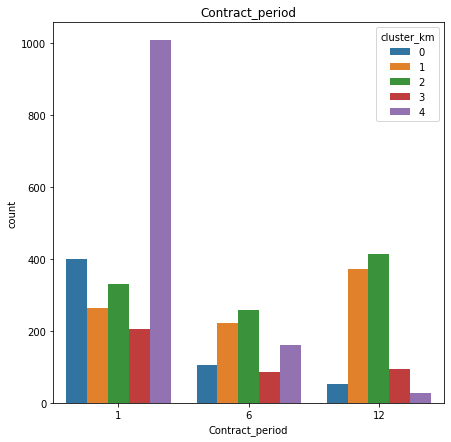

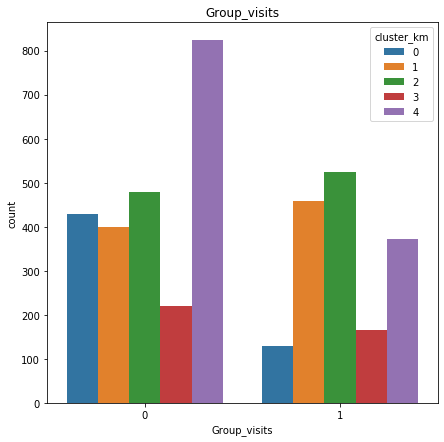

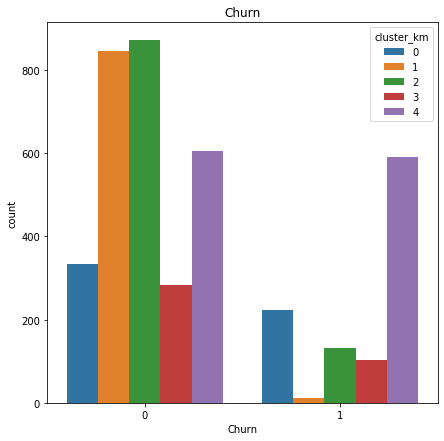

In [34]:
for column in ['gender','Near_Location','Partner','Promo_friends','Phone','Contract_period',\
'Group_visits','Churn']:
    plt.figure(figsize=(7, 7))
    sns.countplot(x = gym_churn[column], hue='cluster_km', data=gym_churn)
    plt.title(column)
    plt.show()

Сотрудников компании-партнёра клуба(Partner) больше всего в 4 кластере, а меньше всего в 3. "Не партнеров" больше всего в 0 кластере, а меньше всего во 2.
Факт первоначальной записи в рамках акции «приведи друга»  больше в 3 кластере, а меньше всего во 1 .
Больше всего клиентов, указавших телефон в 1 кластере.
Больше всего клиентов с контрактным периодам 1 месяц в 0 кластере, в 6 месяцев во 2, 12 месяцев в 4 кластере.
Без групповых визитов больше всего клиентов в 1 кластере. С групповыми визитами - в 4-ом.


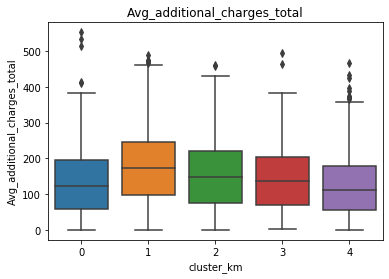

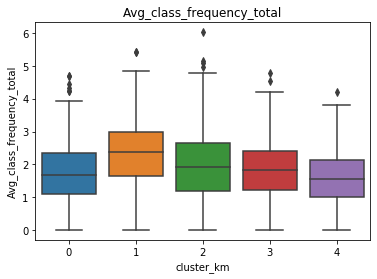

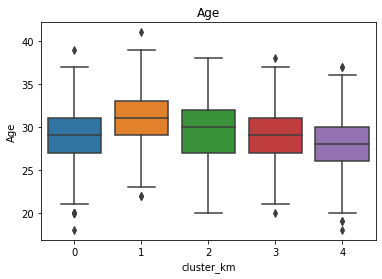

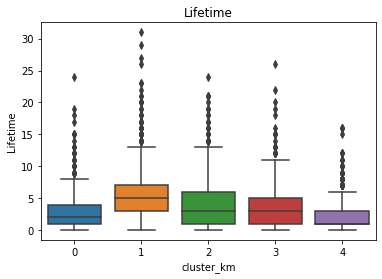

In [35]:
for column in ['Avg_additional_charges_total','Avg_class_frequency_total','Age','Lifetime']:
    sns.boxplot(x = 'cluster_km', y = gym_churn[column], data = gym_churn)
    plt.title(column)
    
    plt.show()

Средняя частота посещений в неделю за все время и за прошлый месяц больше у клиентов из 3-го кластера,меньше всего у клиентов из 0 кластера.Средние траты на доп услуги больше у клиентов 4 кластера и меньше всего у 0.

#### 4.6 Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [36]:
gym_churn.groupby('cluster_km')['Churn'].mean()

cluster_km
0    0.402154
1    0.013986
2    0.131605
3    0.266839
4    0.493311
Name: Churn, dtype: float64

Самая большая доля оттока у 0 кластера - 52%, но при этом он - самый большой по количеству клиентов. Меньше всего отток у 4 кластера - 2%.

<div class="alert alert-success">
<h3> Комментарий ревьювера</h3>

Верный вывод 👍🏻
</div>

### Вывод
Стандартизировали данные.Построили матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовали дендрограмму.На основании построенной дендограммы, можно сделать предположение, что у нас есть 4 кластера.
Обучили модель кластеризации на основании алгоритма K-Means и спрогнозировали кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов.

Кластеры различаются по количеству клиентов.
Наибольший отток у кластеров 0 и 1:
- у них меньше Contract_period
- у них меньше факт посещения групповых занятий
- у них меньше возраст
- у них меньше траты на доп.услуги
- меньше посещений занятий за месяц

Наименьший отток у кластеров 3 и 4:
- Contract_period больше
- возраст больше
- факт посещения групповых занятий больше
- больше Lifetime - время с момента первого обращения
- большими расходами на доп. услуги
- средняя частота посещений в неделю и за  месяц больше

Построили распределения признаков для кластеров:
Сотрудников компании-партнёра клуба(Partner) больше всего в 4 кластере, а меньше всего в 3. "Не партнеров" больше всего в 0 кластере, а меньше всего во 2.

Факт первоначальной записи в рамках акции «приведи друга»  больше в 3 кластере, а меньше всего во 1 .
Больше всего клиентов, указавших телефон в 1 кластере.

Больше всего клиентов с контрактным периодам 1 месяц в 0 кластере, в 6 месяцев во 2, 12 месяцев в 4 кластере.

Без групповых визитов больше всего клиентов в 1 кластере. С групповыми визитами - в 4-ом.

Средняя частота посещений в неделю за все время и за прошлый месяц больше у клиентов из 3-го кластера,меньше всего у клиентов из 0 кластера.Средние траты на доп услуги больше у клиентов 4 кластера и меньше всего у 0.

Для каждого полученного кластера посчитали долю оттока:

Самая большая доля оттока у 0 кластера - 52%, но при этом он - самый большой по количеству клиентов. Меньше всего отток у 4 кластера - 2%.

### <a id='5'>Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами</a>

#### 5.1 Выводы

Посмотрели на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался: 
Видим, что у нас нет различий между средними значениями по гендерному признаку и наличию контактного телефона.По всем остальным признакам средние значения отличаются существенно.Больше всего разница видна в значениях Lifetime и Contract_period . У ушедших клиентов этот показатель кратно ниже. Интересно также, что клиенты, перестающие посещать спортзал, в среднем моложе.Возможно более зрелый человек осознаннее подходит к принятию решений, в том числе, в отношении регулярного посещения спортзала. Вполне логичным выглядит показатель Promo_friends, который у ушедших клиентов вдвое ниже. Часто в компании интереснее тренироваться.

Построили столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался: 
У клиентов из оттока большинство не проживает или не работает в районе, где находится фитнес-центр. Естественно , если человеку нужно далеко ездить, вероятнее он будет искать варианты ближе. Большое число оттока у клиентов с длительностью текущего абонемента - 1 месяц.
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента и 
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц у клиентов из оттока меньше , чем у оставшихся клиентов.
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра у клиентов, которые попали в отток, кратно меньше.


По матрице корреляций видно, что есть две пары сильнокоррелирующих признаков: contract_period-month_to_end_contract; avg_class_frequency_current_month - avg_class_frequency_total.Есть два признака с нулевой корреляцией с целевой переменной: phone и gender.

Обучили модель на train-выборке двумя способами:логистической регрессией и случайным лесом.Доля правильных ответов, точность и  полнота чуть лучше у модели,обученной логистической регрессей. Хотя и случайный лес показал себя довольно хорошо.


Стандартизировали данные.Построили матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовали дендрограмму.На основании построенной дендограммы, можно сделать предположение, что у нас есть 4 кластера.

Наибольший отток у кластеров 0 и 1:
- у них меньше Contract_period
- у них меньше факт посещения групповых занятий
- у них меньше возраст
- у них меньше траты на доп.услуги
- меньше посещений занятий за месяц

Наименьший отток у кластеров 3 и 4:
- Contract_period больше
- возраст больше
- факт посещения групповых занятий больше
- больше Lifetime - время с момента первого обращения
- большими расходами на доп. услуги
- средняя частота посещений в неделю и за  месяц больше


Самая большая доля оттока у 0 кластера - 52%, но при этом он - самый большой по количеству клиентов. Меньше всего отток у 4 кластера - 2%.

#### 5.2 Рекомендации по работе с клиентами
- Сохранять и мотевировать клиентов из кластеров с наименьшим оттоком(выше указаны характеристики этих кластеров): бонусы, спецпрограммы(например).
- Глубже сегментировать клиентов , попадающих в отток.К каждому сегменту подбирать индивидуальные предложения.
- Продолжать акцию Promo_friends.
- Стимулировать клиентов покупать длительные абонементы.К длительным абонементам предлагать дополнительные бонусы.